코랩 런타임 > 런타임 유형 변경 GPU 로 설정 후 과제 진행해주세요 !

< 5주차 과제 >
- 원하는 구조를 가진 CNN을 구축할 수 있다
- 실전적인 이미지 데이터셋을 활용하여 분류 Task를 수행해보자.

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Baseline (복습)

In [ ]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4505590.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 133397.60it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1244995.71it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3091614.54it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5) # in-channel의 갯수 : 1, out-channel의 갯수 (필터의 갯수): 10
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5) # in-channel의 갯수 : 10, out-channel의 갯수 (필터의 갯수): 20
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10)

  def forward(self, x):
    in_size = x.size(0) #size(0)을 하면 x의 크기인 (64, 1, 28, 28)중 64을 리턴함
    x = F.relu(self.mp(self.conv1(x)))
    #x.shape = torch.Size([64, 10, 12, 12])
    #28 - 5 (kernel_size) + 1 (자기자신) // 2 (pooling window shape) -> 12
    x = F.relu(self.mp(self.conv2(x)))
    #x.shape = torch.Size([64, 20, 4, 4])
    #12 - 5 (kernel_size) + 1 (자기자신) // 2 (pooling window shape) -> 4
    x = x.view(in_size, -1)
    #x.shape = torch.Size([64, 320])
    #20 * 4 * 4 = 320
    #따라서 nn.Linear() <- 괄호안에는 320,10이 들어가야함
    x = self.fc(x)
    #x.shape = torch.Size([64, 10])
    return F.log_softmax(x)

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [ ]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-3-f33e4fe198cf>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305236
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.299016
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.299031
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.282818
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.290860
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.260740
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.275000
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.235806
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.218780
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.188300
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.145438
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.105646
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.010936
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.779782
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.674861
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.477295
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.434876
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.932735
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.807364
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.764231
Train Epoch: 1 [12800/60000 (

<ipython-input-6-6ed0d2a1801a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1890, Accuracy: 9458/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.081500
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.412428
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.473795
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.085294
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.132581
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.131673
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.180762
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.222468
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.304443
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.279787
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.216922
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.185268
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.097157
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.180614
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.230460
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.098241
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.239021
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.297490
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.308244
Train Epoch: 2 [12

# [5주차 과제 1 : CNN structure 구현하기]
- 첨부한 이미지의 structure를 구현해주세요!

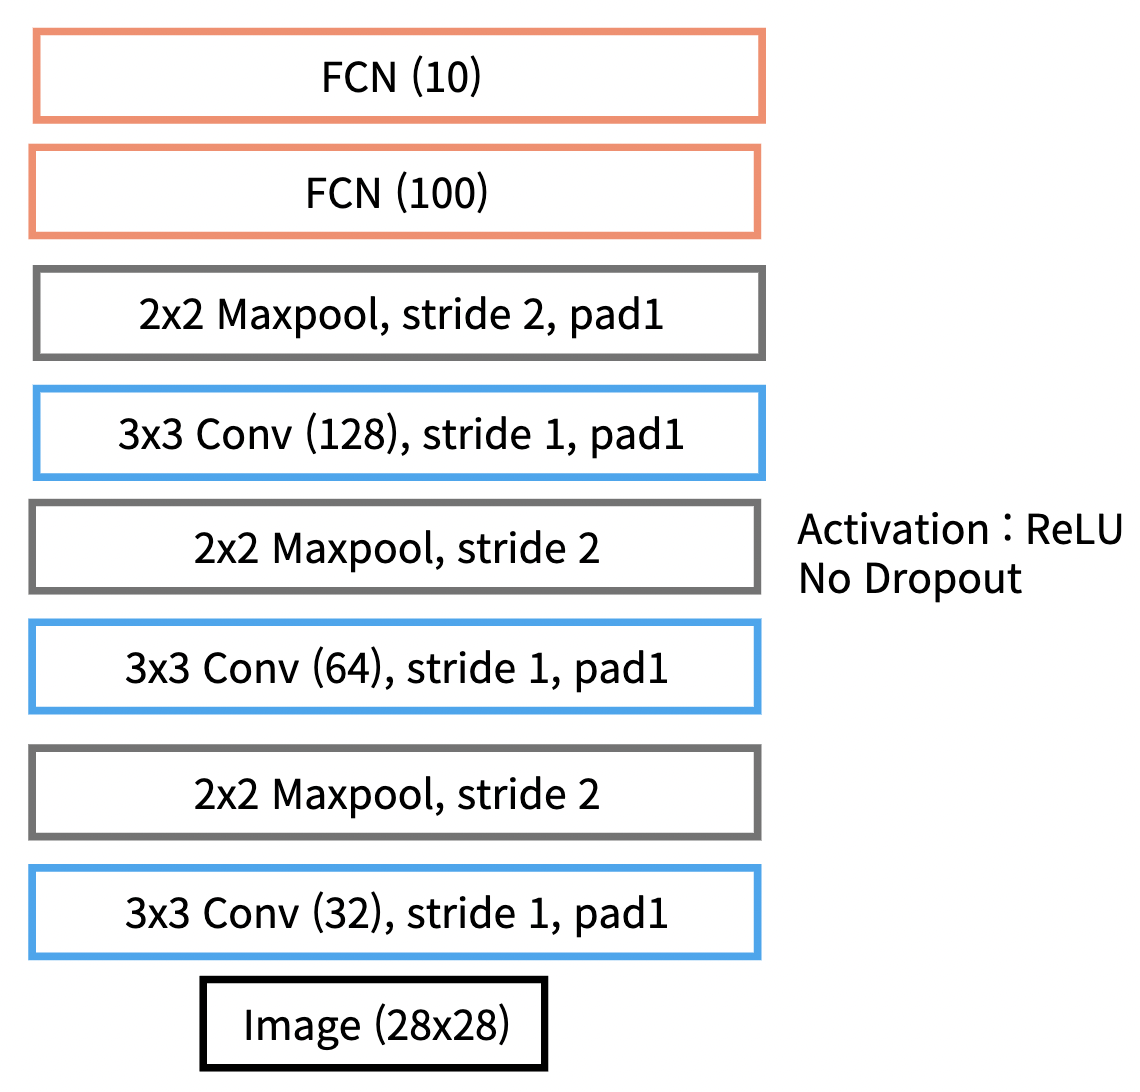

In [ ]:
class revised_Net(nn.Module):
  # NO dropout
  def __init__(self):
    super(revised_Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size = 3, stride=1, padding=1) # in-channel의 갯수 : 1, out-channel의 갯수 (필터의 갯수): 32
    self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, stride=1, padding=1) # in-channel의 갯수 : 32, out-channel의 갯수 (필터의 갯수): 64
    self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, stride=1, padding=1) # in-channel의 갯수 : 64, out-channel의 갯수 (필터의 갯수): 128
    self.mp1 = nn.MaxPool2d(2, stride = 2)
    self.mp2 = nn.MaxPool2d(2, stride = 2,  padding=1)
    self.fcn1 = nn.Linear(2048 , 100)
    #128 * 4 * 4 = 2048
    self.fcn2 = nn.Linear(100, 10)

#기본값 설정 말고는 이전과 거의 동일하게 진행
  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp1(self.conv1(x)))
    x = F.relu(self.mp1(self.conv2(x)))
    x = F.relu(self.mp2(self.conv3(x)))
    x = x.view(in_size, -1)
    #20 * 4 * 4 = 320
    x = self.fcn1(x)
    x = self.fcn2(x)
    return F.log_softmax(x)

In [ ]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.312973


<ipython-input-8-bd39ec50026c>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [640/60000 (1%)]	Loss: 2.306971
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.311906
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.298699
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.290694
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.289892
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.302483
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.289537
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.285507
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.280023
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.285600
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.282281
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.275772
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.268957
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.260011
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.269164
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.253847
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.246163
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.249485
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.236877
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.219346
Train Epoch: 1 [13440/60

<ipython-input-9-252edfe1b05a>:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 0.2515, Accuracy: 9145/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.289527
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.087600
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.365045
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.248821
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.082289
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.148748
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.163511
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.152071
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.141675
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.168690
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.283535
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.184428
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.272260
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.090199
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.203641
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.119112
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.142403
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.089888
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.266516
Train Epoch: 2 [12

# [5주차 과제 2 : CNN 활용하기]
- CIFAR 10 데이터셋을 사용하여,
- CNN을 직접 구현하며, 분류 task를 수행해봅시다.

* 지난번 과제와 마찬가지로 다양한 방식을 시도해보시고 그 시도 기록을 남겨주세요. 가장 성능이 좋았던 모델도 표시해주세요

* 이번엔 GPU resource 문제가 생길 수 있습니다. 파라미터 조정, dropout 추가, layer 수 조정 등 연산 효율성도 고려해서 베이스라인 조정해보세요

https://www.kaggle.com/c/cifar-10/code?competitionId=3649&sortBy=voteCount&excludeNonAccessedDatasources=true

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#랜덤 시드 고정 : 학습을 위한 실험을 할 때 무작위성을 컨트롤하기 위해 사용.
torch.manual_seed(777) #cpu 연산 고정

if device == "cuda:0":
    torch.cuda.manual_seed_all(777) # 멀티 gpu 연산 무작위 고정

import time
import copy

from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Data Augmentation, Transform의 기능은?

# Resize & Crop 기능 제거 <- 학습 및 평가 소요 시간 줄이기 위함
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
batch_size = 32 #batch_size는 원하는 크기로 변경 가능.

#CIFAR-10 dataset은 32 * 32 픽셀의 컬러 이미지로 50000개는 학습 데이터 10000개는 테스트 데이터로 구성되었으며 10개의 클래스로 labeling 되어있다.

cifar_train = datasets.CIFAR10('~/.data', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True)

cifar_test = datasets.CIFAR10('~/.data', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=True)

data_loaders = {'train' : train_loader, 'val': test_loader}
total_batch = {'train' : len(train_loader), 'val': len(test_loader)}

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


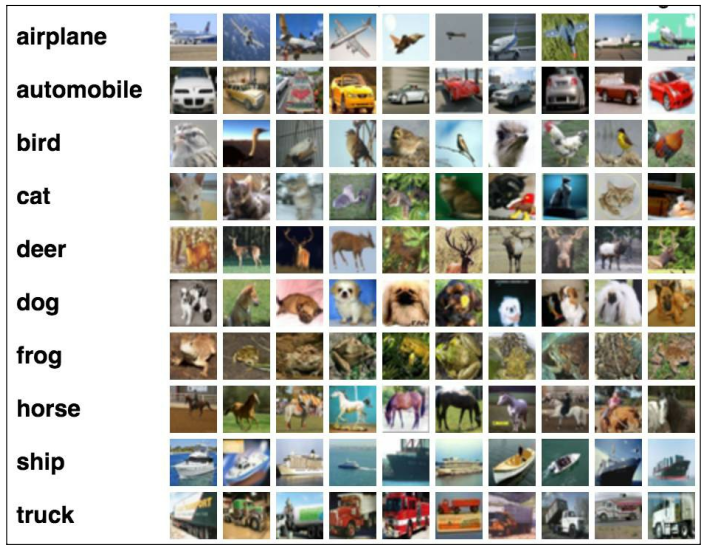

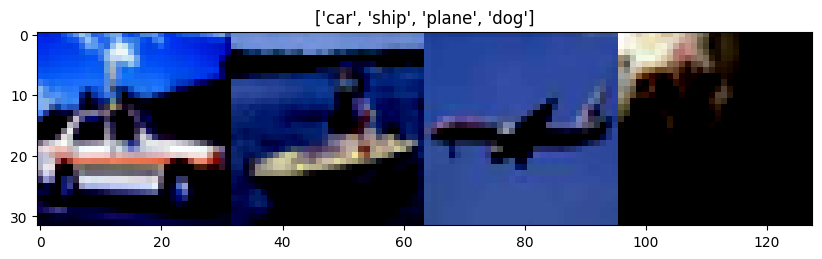

In [ ]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

dataiter       = iter(train_loader)   # iter함수로 iteration 객체 가져오기
images, labels = next(dataiter)   # next함수로 다음 배치 1개 갖고오기

img   = utils.make_grid(images[:4], padding=0)
npimg = img.numpy() #각각의 images는 (3, 32, 32)의 크기를 가지고 있다
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.title([classes[label] for label in labels[:4].tolist()])
plt.show()

In [ ]:
class my_CNN_1(nn.Module):

  def __init__(self):
    super(my_CNN_1, self).__init__()
    self.conv1 = nn.LazyConv2d(32, kernel_size = 3, padding="same")
    self.conv2 = nn.LazyConv2d(32, kernel_size = 3)
    self.conv3 = nn.LazyConv2d(64, kernel_size = 3, padding="same")
    self.conv4 = nn.LazyConv2d(64, kernel_size = 3)

    self.mp = nn.MaxPool2d(2)

    self.fc1 = nn.Linear(2304 , 512)
    self.fc2 = nn.Linear(512, 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.conv1(x))
    x = self.mp(F.relu(self.conv2(x)))

    x = F.relu(self.conv3(x))
    x = self.mp(F.relu(self.conv4(x)))

    x = x.view(in_size, -1)
    x = self.fc1(x)
    x = torch.relu(x)
    x = self.fc2(x)

    return F.log_softmax(x)

    ## 위에서 한 것과 비슷한 방식으로 my_CNN_1 생성
    ## 실행 결과 진행속도가 느리고 정확도가 낮음
    ## 해결방법 -> Dropout & Batch Normalization 사용

    ## [Train Epoch 1] Test set: Average loss: 1.5544, Accuracy: 4352/10000 (44%)
    ## [Train Epoch 2] Test set: Average loss: 1.4213, Accuracy: 4839/10000 (48%)
    ## [Train Epoch 3] Test set: Average loss: 1.2342, Accuracy: 5574/10000 (56%)
    ## ....

In [ ]:
class my_CNN_2(nn.Module): # 성능이 좋았던 모델

  def __init__(self):
    super(my_CNN_2, self).__init__()
    self.conv1 = nn.LazyConv2d(32, kernel_size = 3, padding="same")
    self.conv2 = nn.LazyConv2d(32, kernel_size = 3)
    self.conv3 = nn.LazyConv2d(64, kernel_size = 3, padding="same")
    self.conv4 = nn.LazyConv2d(64, kernel_size = 3)

    self.bn2_1 = nn.LazyBatchNorm2d()
    self.bn2_2 = nn.LazyBatchNorm2d()
    self.bn1 = nn.LazyBatchNorm1d()
    self.mp = nn.MaxPool2d(2)

    self.drop1 = nn.Dropout(0.25)
    self.drop2 = nn.Dropout(0.5)

    self.fc1 = nn.LazyLinear(512)
    self.fc2 = nn.LazyLinear(10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.conv1(x))
    x = self.bn2_1(self.conv2(x))
    x = self.mp(F.relu(x))
    x = self.drop1(x)

    x = F.relu(self.conv3(x))
    x = self.bn2_2(self.conv4(x))
    x = self.mp(F.relu(x))
    x = self.drop1(x)


    x = x.view(in_size, -1)
    x = self.bn1(self.fc1(x))
    x = torch.relu(x)
    x = self.drop2(x)
    x = self.fc2(x)

    return F.log_softmax(x)

    ## [Train Epoch 1] Test set: Average loss: 1.0285, Accuracy: 6296/10000 (63%)
    ## [Train Epoch 2] Test set: Average loss: 0.8731, Accuracy: 6943/10000 (69%)
    ## [Train Epoch 3] Test set: Average loss: 0.8205, Accuracy: 7070/10000 (71%)
    ## ....
    ## [Train Epoch 9] Test set: Average loss: 0.6007, Accuracy: 7925/10000 (79%)


In [ ]:
model = my_CNN_2()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1,10):
    train(epoch)
    test()

<ipython-input-67-d7a5536b93e2>:40: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.491817
Train Epoch: 1 [320/50000 (1%)]	Loss: 2.154276
Train Epoch: 1 [640/50000 (1%)]	Loss: 2.080247
Train Epoch: 1 [960/50000 (2%)]	Loss: 1.696006
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.989391
Train Epoch: 1 [1600/50000 (3%)]	Loss: 1.725111
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.933182
Train Epoch: 1 [2240/50000 (4%)]	Loss: 1.893531
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.695114
Train Epoch: 1 [2880/50000 (6%)]	Loss: 1.784837
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.750685
Train Epoch: 1 [3520/50000 (7%)]	Loss: 1.693275
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.706318
Train Epoch: 1 [4160/50000 (8%)]	Loss: 1.764750
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.796306
Train Epoch: 1 [4800/50000 (10%)]	Loss: 1.328143
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.394316
Train Epoch: 1 [5440/50000 (11%)]	Loss: 1.207930
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.854715
Train Epoch: 1 [6080/50000 (12%)]	Loss: 1.531609
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1

<ipython-input-48-6ed0d2a1801a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 1.0285, Accuracy: 6296/10000 (63%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.222749
Train Epoch: 2 [320/50000 (1%)]	Loss: 1.829064
Train Epoch: 2 [640/50000 (1%)]	Loss: 1.491128
Train Epoch: 2 [960/50000 (2%)]	Loss: 1.361361
Train Epoch: 2 [1280/50000 (3%)]	Loss: 1.307814
Train Epoch: 2 [1600/50000 (3%)]	Loss: 1.278837
Train Epoch: 2 [1920/50000 (4%)]	Loss: 0.880242
Train Epoch: 2 [2240/50000 (4%)]	Loss: 0.979895
Train Epoch: 2 [2560/50000 (5%)]	Loss: 1.025977
Train Epoch: 2 [2880/50000 (6%)]	Loss: 1.167036
Train Epoch: 2 [3200/50000 (6%)]	Loss: 1.038495
Train Epoch: 2 [3520/50000 (7%)]	Loss: 1.210123
Train Epoch: 2 [3840/50000 (8%)]	Loss: 0.779108
Train Epoch: 2 [4160/50000 (8%)]	Loss: 0.841710
Train Epoch: 2 [4480/50000 (9%)]	Loss: 1.129211
Train Epoch: 2 [4800/50000 (10%)]	Loss: 0.893765
Train Epoch: 2 [5120/50000 (10%)]	Loss: 1.322568
Train Epoch: 2 [5440/50000 (11%)]	Loss: 1.449447
Train Epoch: 2 [5760/50000 (12%)]	Loss: 1.009491
Train Epoch: 2 [6080/50000 (1